In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\patil\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading the Dataset

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,115,5.8,2.8,5.1,2.4,Iris-virginica
1,114,5.7,2.5,5.0,2.0,Iris-virginica
2,147,6.3,2.5,5.0,1.9,Iris-virginica
3,102,5.8,2.7,5.1,1.9,Iris-virginica
4,143,5.8,2.7,5.1,1.9,Iris-virginica


In [3]:
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.8,2.8,5.1,2.4,Iris-virginica
1,5.7,2.5,5.0,2.0,Iris-virginica
2,6.3,2.5,5.0,1.9,Iris-virginica
3,5.8,2.7,5.1,1.9,Iris-virginica
4,5.8,2.7,5.1,1.9,Iris-virginica


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

# Preprocessing dataset

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Analysis

<AxesSubplot:>

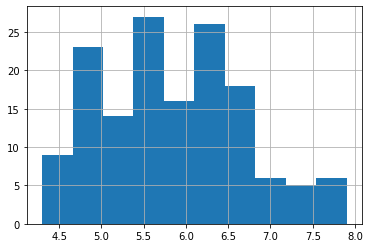

In [8]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

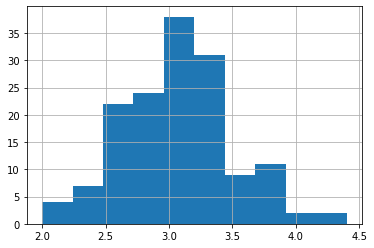

In [9]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

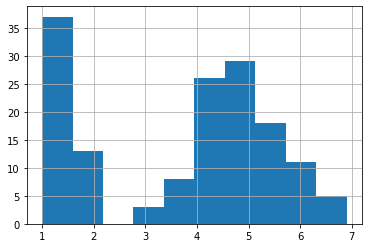

In [10]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

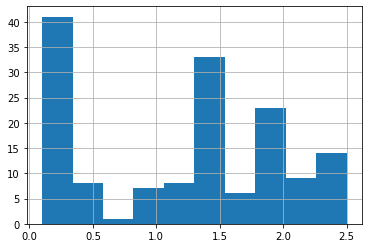

In [11]:
df['PetalWidthCm'].hist()

In [12]:
#create list of colors and class labels
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

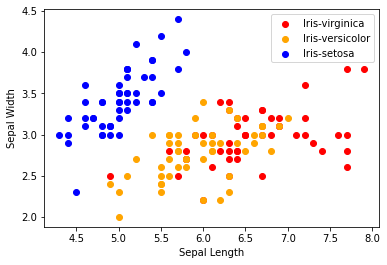

In [13]:
for i in range(3):
    #filter data on each class
    x=df[df['Species']==species[i]]
    #plot sctterplot
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

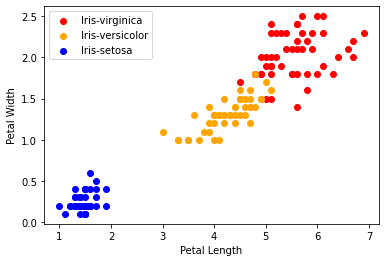

In [14]:
for i in range(3):
    #filter data on each class
    x=df[df['Species']==species[i]]
    #plot sctterplot
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

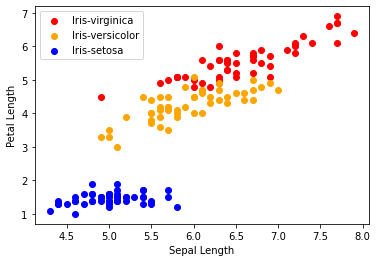

In [15]:
for i in range(3):
    #filter data on each class
    x=df[df['Species']==species[i]]
    #plot sctterplot
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

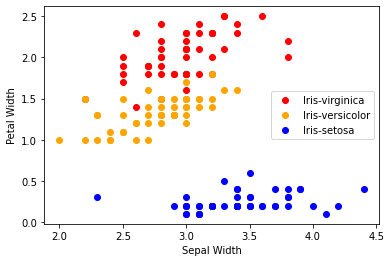

In [16]:
for i in range(3):
    #filter data on each class
    x=df[df['Species']==species[i]]
    #plot sctterplot
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Correlation Matrix

In [17]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

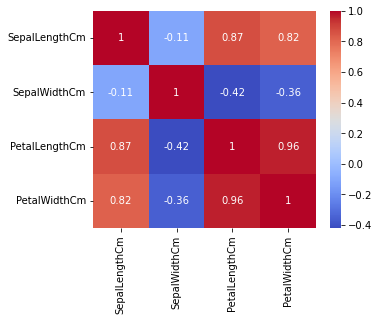

In [18]:
#heatmap
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

# Model Training and Testing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
x=df.drop(columns=['Species'])
y=df["Species"]

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)

In [22]:
model=LogisticRegression()
model.fit(xtrain,ytrain)
print("Logistic Regression Accuracy: ",model.score(xtest,ytest)*100)

Logistic Regression Accuracy:  93.33333333333333


In [23]:
#model training 
model.fit(xtrain.values,ytrain.values)

LogisticRegression()

In [24]:
print("Accuracy: ",model.score(xtest,ytest)*100)

Accuracy:  93.33333333333333


In [25]:
#KNeighborsClassifier
model1=KNeighborsClassifier()
model1.fit(xtrain,ytrain)
print("K-nearest neighbors Accuracy: ",model1.score(xtest,ytest)*100)

K-nearest neighbors Accuracy:  97.77777777777777


In [26]:
model1.fit(xtrain.values,ytrain.values)

KNeighborsClassifier()

In [27]:
print("Accuracy: ",model1.score(xtest,ytest)*100)

Accuracy:  97.77777777777777


In [28]:
#Decision Tree
model2=DecisionTreeClassifier()
model2.fit(xtrain,ytrain)
print("Decision Tree Accuracy: ",model2.score(xtest,ytest)*100)

Decision Tree Accuracy:  91.11111111111111


In [29]:
#save the model
import pickle
filename='saved_model.pkl'
pickle.dump(model,open(filename,'wb'))

In [30]:
load_model=pickle.load(open(filename,'rb'))

In [31]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)

In [32]:
xtest.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
49,6.3,3.3,4.7,1.6
122,4.6,3.1,1.5,0.2
43,4.9,2.5,4.5,1.7
34,6.9,3.1,5.4,2.1
147,5.8,4.0,1.2,0.2
